<img align="left" src="img/notebook_banner_siegel.png" style="width:1100px;">

# Visualizing spatial data with Python

In [1]:
%matplotlib inline

import pandas as pd
import geopandas

import matplotlib.pyplot as plt

pd.options.display.max_rows = 10

In [13]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [60]:
countries = geopandas.read_file("zip://./data/ne_110m_admin_0_countries.zip")
cities = geopandas.read_file("zip://./data/ne_110m_populated_places.zip")
rivers = geopandas.read_file("zip://./data/ne_50m_rivers_lake_centerlines.zip")

## GeoPandas visualization functionality

#### Basic plot

<AxesSubplot:>

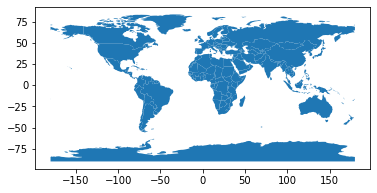

In [15]:
countries.plot()

#### Adjusting the figure size

<AxesSubplot:>

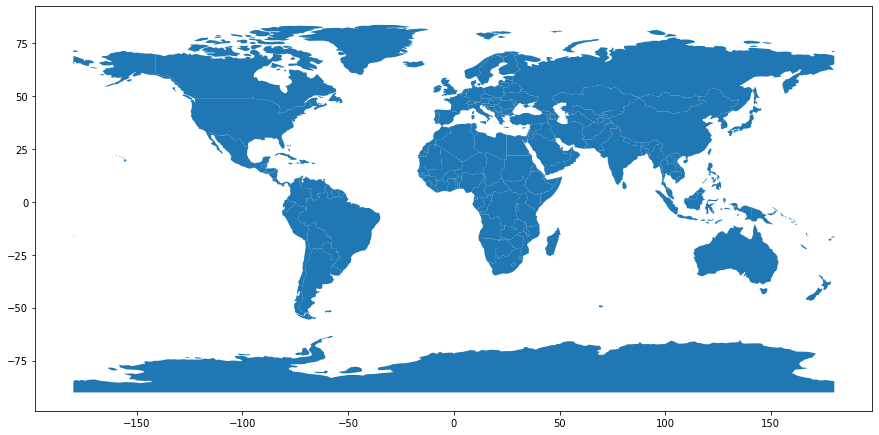

In [16]:
countries.plot(figsize=(15, 15))

#### Removing the box / x and y coordinate labels

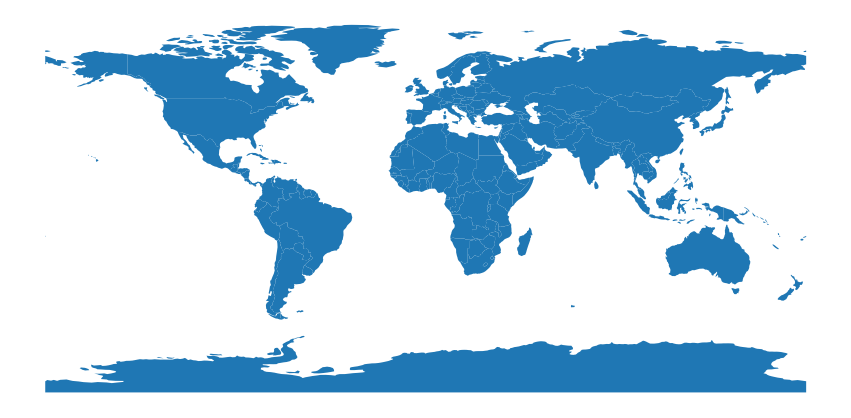

In [17]:
ax = countries.plot(figsize=(15, 15))
ax.set_axis_off()

#### Coloring based on column values

Let's first create a new column with the GDP per capita:

In [20]:
countries = countries[(countries['pop_est'] >0 ) & (countries['name'] != "Antarctica")]

In [21]:
countries['gdp_per_cap'] = countries['gdp_md_est'] / countries['pop_est'] * 100

and now we can use this column to color the polygons:

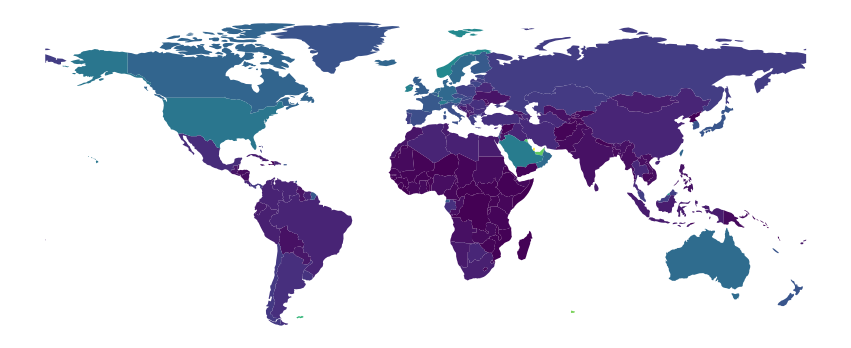

In [22]:
ax = countries.plot(figsize=(15, 15), column='gdp_per_cap')
ax.set_axis_off()

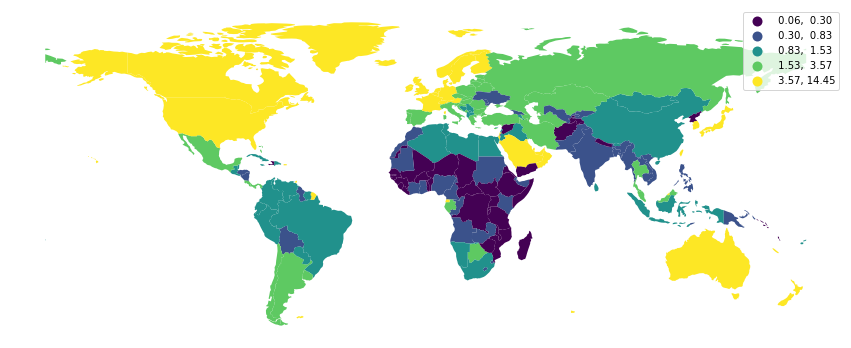

In [23]:
ax = countries.plot(figsize=(15, 15), column='gdp_per_cap', scheme='quantiles', legend=True)
ax.set_axis_off()

#### Combining different dataframes on a single plot

The `.plot` method returns a matplotlib Axes object, which can then be re-used to add additional layers to that plot with the `ax=` keyword:

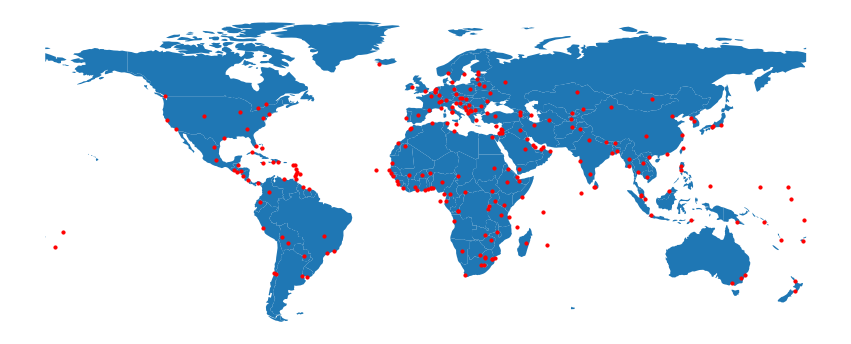

In [24]:
ax = countries.plot(figsize=(15, 15))
cities.plot(ax=ax, color='red', markersize=10)
ax.set_axis_off()

[(-20.0, 60.0), (-40.0, 40.0)]

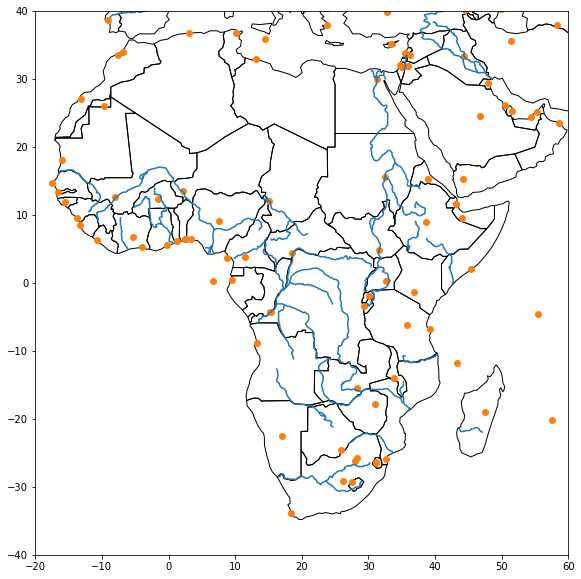

In [25]:
ax = countries.plot(edgecolor='k', facecolor='none', figsize=(15, 10))
rivers.plot(ax=ax)
cities.plot(ax=ax, color='C1')
ax.set(xlim=(-20, 60), ylim=(-40, 40))

## Using `geoplot`

The `geoplot` packages provides some additional functionality compared to the basic `.plot()` method on GeoDataFrames:

- High-level plotting API (with more plot types as geopandas)
- Native projection support

https://residentmario.github.io/geoplot/index.html

In [26]:
import geoplot
import geoplot.crs as gcrs

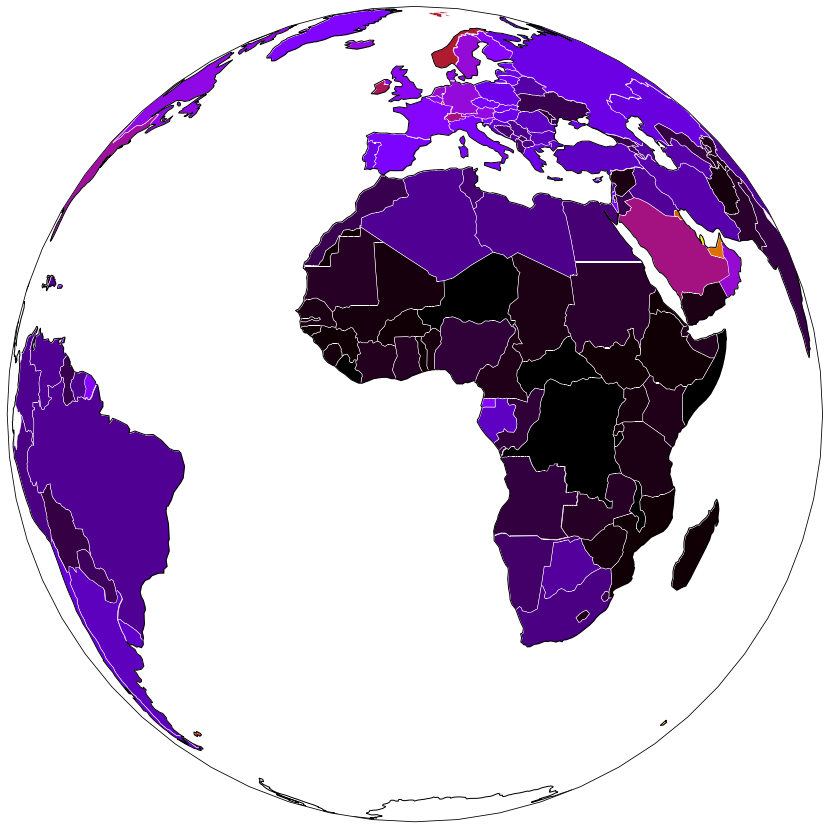

In [50]:
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw={
    'projection': gcrs.Orthographic(central_latitude=0, central_longitude=0)
})
geoplot.choropleth(countries, hue='gdp_per_cap', projection=gcrs.Orthographic(), ax=ax,
                   cmap='gnuplot', linewidth=0.5, edgecolor='white')
ax.set_global()
ax.outline_patch.set_visible(True)
ax.coastlines()

## Using `cartopy`

Cartopy is nothing more than matplotlib cartographic library using `geoplot` for projections. 

http://scitools.org.uk/cartopy/docs/latest/index.html

The following example is taken from the docs: http://geopandas.readthedocs.io/en/latest/gallery/cartopy_convert.html#sphx-glr-gallery-cartopy-convert-py

In [43]:
from cartopy import crs as ccrs

<AxesSubplot:>

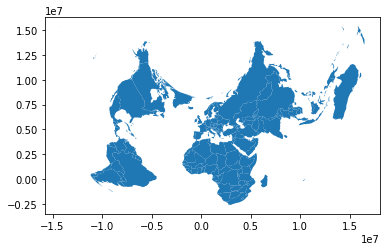

In [44]:
# Define the CartoPy CRS object.
crs = ccrs.AlbersEqualArea()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
countries_ae = countries.to_crs(crs_proj4)

# Here's what the plot looks like in GeoPandas
countries_ae.plot()

## Interactive web-based visualizations

You can find a library for everything, e.g. that target interactive web-based visualizations and that can handle geospatial data. Some packages with an example for each:

- Bokeh: https://bokeh.pydata.org/en/latest/docs/gallery/texas.html
- GeoViews (other interface to Bokeh/matplotlib): http://geo.holoviews.org
- Altair: https://altair-viz.github.io/gallery/choropleth.html
- Plotly: https://plot.ly/python/#maps
- ...

Another popular javascript library for online maps is [Leaflet.js](https://leafletjs.com/), and this has python bindings in the [folium](https://github.com/python-visualization/folium) and [ipyleaflet](https://github.com/jupyter-widgets/ipyleaflet) packages.

Interactive using the folium library:

In [51]:
import folium

In [58]:
# write variable with OSM layer zooming to null island
m = folium.Map([0, 0], zoom_start=6, tiles="OpenStreetMap")
# add new layer from the internet
folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True
       ).add_to(m)
# add vector data
folium.GeoJson(countries.to_json(), name="World").add_to(m)
# add layer control
folium.LayerControl().add_to(m)

m

In [64]:
m = folium.Map([0, 0], zoom_start=6, tiles="OpenStreetMap")

# add city layer
folium.GeoJson(cities.to_json()).add_to(m)
#

folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True
       ).add_to(m)
folium.GeoJson(countries.to_json(), name="World").add_to(m)
folium.LayerControl().add_to(m)
m